In [56]:
%matplotlib inline 

import numpy as np
import math
import matplotlib.pyplot as plt
import random as ra

In [57]:
Nsimula = 10000 
Xtef = [] 
for i in range(Nsimula):
  Xant1 = ra.randint(1234,434287492)
  Xant2 = ra.randint(1234,514324426)
  M = 99999.0
  T = 40.0
  at = []
  an = []
  LLt = []
  St = []

  def gencongru1(): 
      global Xant1
      a = 134775813
      c = 1
      m = 2**32
      Xnext = (a * Xant1 + c) % m
      Xant1 = Xnext
      U = Xnext / m
      return U

  def gencongru2():
      global Xant2
      a = 1140671485
      c = 12820163
      m = 2**24
      Xnext = (a * Xant2 + c) % m
      Xant2 = Xnext
      U = Xnext / m
      return U

  def GenerarX():
      vlambda = 3
      U = gencongru1()
      X = -(math.log(1-U))/float(vlambda)
      return X

  def GenerarY():
      vlambda = 7
      U = gencongru2()
      Y = -(math.log(1-U))/float(vlambda)
      return Y

  def Llegada(tsuc):
      global n, NLL, NS, t, S, Serv, LL, at, an
      t=tsuc
      n = n + 1
      LLt.append(t)
      at.append(t)
      an.append(n)
      
      NLL = NLL + 1
      LL.append(t)
      
      X = GenerarX()
      
      if (t+X) < T:
          TSuc['tLL'] = t + X
      if n==1:
          Y = GenerarY()
          TSuc['tS'] = t + Y
          #Serv[NS]=Y 
          Serv.append(Y)
          
  def Servidor(tsuc):
      global n, NLL, NS, t, S, Serv, LL, at, an
      t = tsuc
      n = n - 1
      
      St.append(t)
      at.append(t)
      an.append(n)
      
      NS = NS + 1
      S.append(t)

      if n>0:
          Y = GenerarY()
          TSuc['tS'] = t + Y
          Serv.append(Y) 

  t = tsuc = NLL = NS = n = 0

  at.append(t)
  an.append(n)

  TSuc = {"tLL":M, "tS":M}

  LL = []
  S = []
  Serv = []
  LL.append(0.0)
  S.append(0.0)
  Serv.append(0.0)

  X = GenerarX()

  if X > T:
      Tp = t_med_sistema = t_med_cola = 0.0
      exit
  else:
      Llegada(X)
      while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
          if TSuc['tLL'] < TSuc['tS']:
              tsuc = TSuc['tLL']
              TSuc['tLL'] = M
              Llegada(tsuc)
              
          if TSuc['tS'] < TSuc['tLL']:
              tsuc = TSuc['tS']
              TSuc['tS'] = M
              Servidor(tsuc)

      Tp = max(0,t-T)
      acumulo1 = acumulo2 = 0.0
      ind = 0
      
      while ind < NLL:
          acumulo1 = acumulo1 + S[ind] - LL[ind]
          acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
          ind = ind + 1
      t_med_sistema = acumulo1/NLL
      t_med_cola = acumulo2/NLL

      exit

  at = np.array(at)
  an = np.array(an)
  LLt = np.array(LLt)
  St = np.array(St)
  Xtef.append(t_med_cola)

def media_vari(Xtef):
  media = []
  varianza = []
  for i in range(len(Xtef)):
    if i == 0:
      media.append(Xtef[i])
      varianza.append(0)
    else:
      media.append(media[i-1]+((Xtef[i]-media[i-1])/(i+1)))
      varianza.append(((1-(1/i))*varianza[i-1])+((i+1)*((media[i]-media[i-1])**2)))
  return media,varianza

ME,VA = media_vari(Xtef)
print("Media para k = 100 =", ME[100], "|| Varianza para k = 100 =", VA[100])
print("Media para k = 1000 =", ME[1000], "|| Varianza para k = 1000 =", VA[1000])
print("Media para k = 10000 =", ME[len(Xtef)-1], "|| Varianza para k = 10000 =", VA[len(Xtef)-1])

Media para k = 100 = 0.1011530137411839 || Varianza para k = 100 = 0.001551646922619236
Media para k = 1000 = 0.10257585991937827 || Varianza para k = 1000 = 0.002082450922555454
Media para k = 10000 = 0.10370846006103909 || Varianza para k = 10000 = 0.002119470414336056


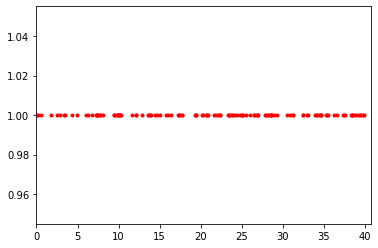

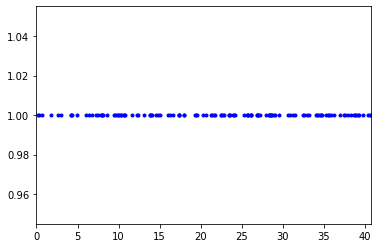

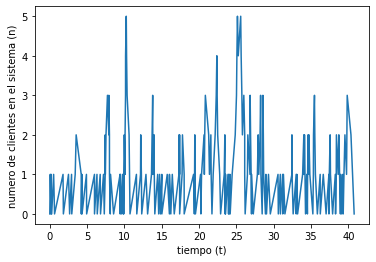

Tiempo medio de los clientes en el sistema:  0.23571525878817856
Tiempo medio de los clientes en la cola:  0.09067351740497277
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  0.7779230477055208
Número máximo de clientes en el sistema:  5
Total de clientes que pasaron por el sistema:  123


In [58]:
tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el sistema: ",NLL)